In [55]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [56]:
DATADIR = "C:/Users/s2007/Document/py/ML/Keras/kagglecatsanddogs_3367a/PetImages/"

CATEGORIES = ["Dog/", "Cat/"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [57]:
print(img_array)

[[117 117 119 ... 133 132 132]
 [118 117 119 ... 135 134 134]
 [119 118 120 ... 137 136 136]
 ...
 [ 79  74  73 ...  80  76  73]
 [ 78  72  69 ...  72  73  74]
 [ 74  71  70 ...  75  73  71]]


<IPython.core.display.Javascript object>


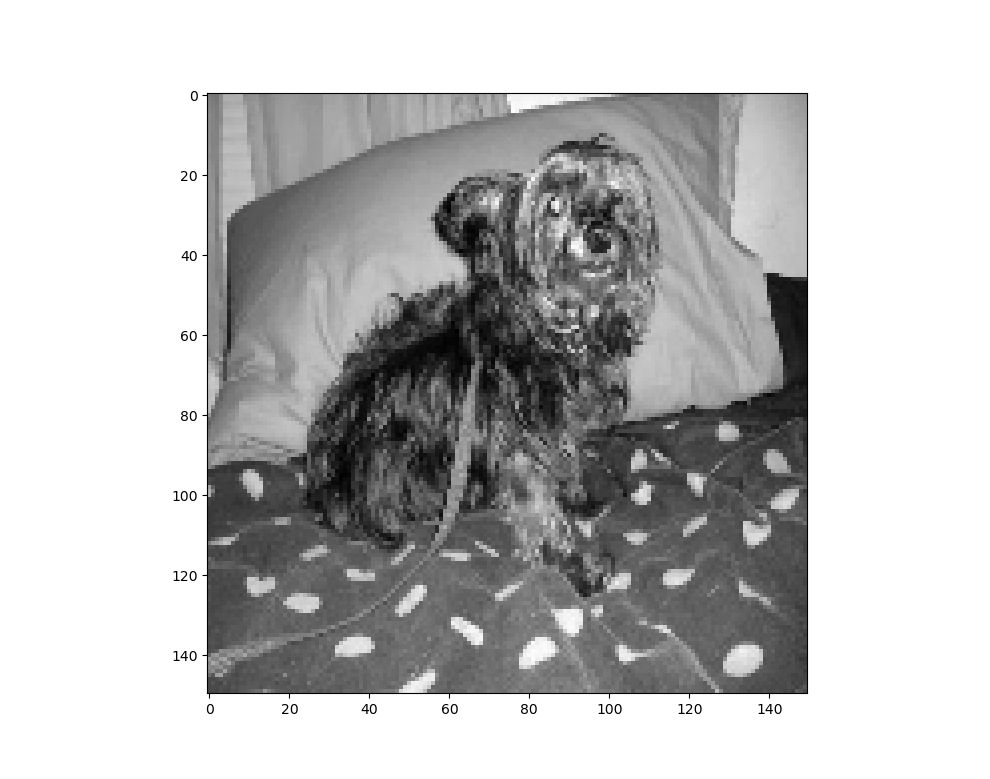

In [58]:
IMG_SIZE = 150
%matplotlib notebook
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')


In [59]:
training_data = []

def create_train():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except: #  Exception as e
                pass
            
create_train()

In [60]:
print(len(training_data))

24946


In [61]:
#shuffle
import random
random.shuffle(training_data)

In [62]:
for sample in training_data[:10]:
    print(sample[1])

0
0
1
1
0
1
0
1
1
1


In [63]:
x = []
y = []

In [64]:
for features, label in training_data:
    x.append(features)
    y.append(label)
    
x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # 1 because grey scale, can do color -> 3

In [65]:
import pickle

pickle_out = open("x.pickle", "wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()